# NVCS_Tool Example usage

To use `ncvs_tool` in a project:

In [12]:
import ncvs_tool

print(ncvs_tool.__version__)

## Query Data
The data requested from API is encoded version, shown as follow (e.g.year = 2020) :

In [23]:
# this is tool to query data
from ncvs_tool import ncvs_tool as ntool

# access National Crime Victimization Survey "Personal Victimization" data in 2020 directly without original label meaning:
df_2020_encode = ntool.NCVStool(dataname = "Personal Victimization").query(encode = True, year = 2020)
print(f"There are totally {len(df_2020_encode)} records.")

There are totally 1618 records.


In [24]:
# access National Crime Victimization Survey "Personal Victimization" data in 2020 with original label meaning:
df_2020_encode = ntool.NCVStool(dataname = "Personal Victimization").query(encode = False, year = 2020)
print(f"There are totally {len(df_2020_encode)} records.")

There are totally 1618 records.


### Query with condition:
> where = "condition1 AND condition2 ..." or where = "condition1 OR condition2 ..."
> condition could be with ">", "<", ">=" or  "<=", etc.

In [6]:
# access National Crime Victimization Survey "Personal Victimization" data in 2020 with original label meaning
# and query condition is "reported to police" and "sex is female":
df_2020_encode = ntool.NCVStool(dataname = "Personal Victimization").query(encode = False, year = 2020, where = "notify=1 AND sex=2")
print(f"There are totally {len(df_2020_encode)} records.")

There are totally 388 records.


,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,193887138419998156323411602,2020.1,2020,18-24,Female,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999","$25,000 to $49,999",...,No weapon,Not injured,No injury,Not injured,30 or older,Male,Non-Hispanic black,3009.73774288887,Not a series crime,3009.73774288887
1,175842688444367756825621201,2020.1,2020,35-49,Female,Non-Hispanic,Black,Non-Hispanic black,"$7,500 to $14,999","Less than $25,000",...,No weapon,Injured,Minor injury,"Treated at scene,",18-29,Male,Non-Hispanic black,6711.7784537528,Not a series crime,6711.7784537528
2,167811020352351956383612102,2020.1,2020,25-34,Female,Non-Hispanic,Asian NativeHawaiian OtherPacific Islander,Non-Hispanic Asian Native Hawaiian Other Pacif...,"$75,000 or more","$200,000 or more",...,Firearm,Not injured,No injury,Not injured,18-29,Male,Non-Hispanic black,5916.7057363109,Not a series crime,5916.7057363109


In [7]:
# get valid params:
valid_params = ntool.NCVStool(dataname = "Personal Victimization").get_valid_params()
print(valid_params)

{'race_ethnicity', 'newoff', 'serious', 'idper', 'seriousviolent', 'direl', 'offendersex', 'ager', 'injury', 'treatment', 'newcrime', 'year', 'vicservices', 'weapcat', 'wgtviccy', 'hispanic', 'citizen', 'hincome2', 'notify', 'hincome1', 'sex', 'msa', 'veteran', 'popsize', 'educatn1', 'race', 'region', 'yearq', 'marital', 'offtracenew', 'locality', 'offenderage', 'series', 'newwgt', 'locationr', 'weapon', 'educatn2'}


In [31]:
# get valid labels for a certain param:
# valid_labels_weapon = ntool.NCVStool().get_valid_label("weapon")
# print(valid_labels_weapon)

## Simple Analysis
1) get yearly amount of victimization and its rate, this is a time series with option to output picture;

2) get yearly report of certain feature in subgroups, with option to output comparison plot.

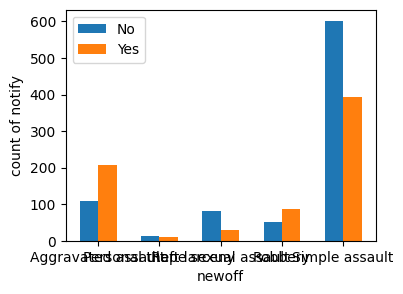

In [19]:
# getting the situation of "report to police" in subgroup of different crimes:
from ncvs_tool import ncvs_aly as naly
df_2020_crimes_notify = naly.year_report(year = 2020, group = "newoff", target="notify", dataname="Personal Victimization", target_range=2, pivot=True,encode=False, output_pct=False, output_picture=True)

In [20]:
df_2020_crimes_notify
# this is pivot version and output is count of each crimes in "no" or "yes":

notify,No,Yes
newoff,,
Aggravated assault,109,206
Personal theft larceny,13,10
Rape sexual assault,80,29
Robbery,52,88
Simple assault,602,393


In [21]:
## same exmple as before, but opt out to output picture and provide percentage of "notify to police" in each subgroup of crimes:
df_2020_crimes_notify_pct = naly.year_report(year = 2020, group = "newoff", target="notify", dataname="Personal Victimization", target_range=2, pivot=True,encode=False, output_pct=True, output_picture=False)
df_2020_crimes_notify_pct

notify,No,Yes
newoff,,
Aggravated assault,0.346032,0.653968
Personal theft larceny,0.565217,0.434783
Rape sexual assault,0.733945,0.266055
Robbery,0.371429,0.628571
Simple assault,0.605025,0.394975


In [22]:
# getting data without pivot, tidy version of data:
df_2020_crimes_notify_pct = naly.year_report(year = 2020, group = "newoff", target="notify", dataname="Personal Victimization", target_range=2, pivot=False,encode=False, output_picture=False)
df_2020_crimes_notify_pct

,newoff,notify,count
0,Rape sexual assault,Yes,29
1,Rape sexual assault,No,80
4,Robbery,Yes,88
5,Robbery,No,52
7,Aggravated assault,Yes,206
8,Aggravated assault,No,109
10,Simple assault,Yes,393
11,Simple assault,No,602
14,Personal theft larceny,Yes,10
15,Personal theft larceny,No,13
